In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

In [2]:
# Import API key
from api_keys import api_key


In [3]:
#installing citipy package in jupyter
import sys
!{sys.executable} -m pip install citipy

In [4]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [5]:
# Output File (CSV)
output_data_file = "C:/Users/bvkka/WUSTL201904DATA2/02-Homework/06-Python-APIs/cities.csv"

In [19]:
#Output for figures
Figures = "C:/Users/bvkka/WUSTL201904DATA2/02-Homework/06-Python-APIs/"

In [6]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

 Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

In [13]:
# Create empty data frame and add columns for city, country, latitude and longitude
cities_list = pd.DataFrame()
cities_list["City"] = ""
cities_list["Country"] = ""
# Randomly generate numbers for latitude and longitude and loop through 500 times
cities_list["Latitude"] = [np.random.uniform(-90.000, 90.000) for x in range(1500)]
cities_list["Longitude"] = [np.random.uniform(-180.000, 180.000) for x in range(1500)]
# Use latitude and longitude to find city and country by using interrows and citipy
for index, row in cities_list.iterrows():
    lat = row["Latitude"]
    lng = row["Longitude"]
    cities_list.set_value(index, "City", citipy.nearest_city(lat, lng).city_name)
    cities_list.set_value(index, "Country", citipy.nearest_city(lat, lng).country_code)
# Delete any possible duplicate cities and reset index
cities_list = cities_list.drop_duplicates(["City", "Country"])
cities_list = cities_list.reset_index()
# Update data frame to just city and country column
cities_list = cities_list[["City", "Country"]]
cities_list = cities_list.iloc[:500]
cities_list.head()

C:\Users\bvkka\Anaconda3new\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\bvkka\Anaconda3new\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,City,Country
0,port lincoln,au
1,kavieng,pg
2,marsh harbour,bs
3,pisco,pe
4,yellowknife,ca


Perform API Calls

In [9]:
import urllib
# OpenWeatherMap API Key
api_key = "41a943dc646073762f99a174583d2b41"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + urllib.request.pathname2url(city)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    print(city_url)

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=katsuura
Processing Record 2 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=punta%20arenas
Processing Record 3 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=thompson
Processing Record 4 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=barrow
Processing Record 5 of Set 1 | ohangaron
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=ohangaron
Processing Record 6 of Set 1 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=hasaki
Processing Record 7 of S

Processing Record 4 of Set 2 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=kapaa
Processing Record 5 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=mar%20del%20plata
Processing Record 6 of Set 2 | kozan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=kozan
Processing Record 7 of Set 2 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=tasiilaq
Processing Record 8 of Set 2 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=henties%20bay
Processing Record 9 of Set 2 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=iqaluit
Processing Record 10 of Set 2 | sabzevar
http://api.openweathermap.org/data/2.5/

Processing Record 7 of Set 3 | motygino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=motygino
Processing Record 8 of Set 3 | taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=taoudenni
Processing Record 9 of Set 3 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=taolanaro
City not found. Skipping...
Processing Record 10 of Set 3 | caxhuacan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=caxhuacan
Processing Record 11 of Set 3 | ekhabi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=ekhabi
Processing Record 12 of Set 3 | cabo san lucas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=cabo%20san%20lucas
Processing Record 13 of Set 3 | tuatape

Processing Record 11 of Set 4 | finnsnes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=finnsnes
Processing Record 12 of Set 4 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=pisco
Processing Record 13 of Set 4 | khandyga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=khandyga
Processing Record 14 of Set 4 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=geraldton
Processing Record 15 of Set 4 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=provideniya
Processing Record 16 of Set 4 | balaipungut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=balaipungut
Processing Record 17 of Set 4 | lagoa
http://api.openweathermap.org/data/2

Processing Record 15 of Set 5 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=airai
Processing Record 16 of Set 5 | kalmunai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=kalmunai
Processing Record 17 of Set 5 | krasnoselkup
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=krasnoselkup
City not found. Skipping...
Processing Record 18 of Set 5 | pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=pierre
Processing Record 19 of Set 5 | kerrville
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=kerrville
Processing Record 20 of Set 5 | vredendal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=vredendal
Processing Record 21 of Set 5 | hovd
http://api.open

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=deer%20lake
Processing Record 18 of Set 6 | ouadda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=ouadda
Processing Record 19 of Set 6 | manzil tamim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=manzil%20tamim
City not found. Skipping...
Processing Record 20 of Set 6 | del gallego
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=del%20gallego
Processing Record 21 of Set 6 | belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=belushya%20guba
City not found. Skipping...
Processing Record 22 of Set 6 | imbituba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=imbituba
Processing Record 23 of Set 6 | iskate

Processing Record 20 of Set 7 | nagato
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=nagato
Processing Record 21 of Set 7 | aitape
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=aitape
Processing Record 22 of Set 7 | jabinyanah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=jabinyanah
Processing Record 23 of Set 7 | severomuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=severomuysk
Processing Record 24 of Set 7 | norfolk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=norfolk
Processing Record 25 of Set 7 | purushottampur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=purushottampur
Processing Record 26 of Set 7 | takoradi
http://api.openweathermap.org

Processing Record 23 of Set 8 | coihaique
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=coihaique
Processing Record 24 of Set 8 | matagami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=matagami
Processing Record 25 of Set 8 | karratha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=karratha
Processing Record 26 of Set 8 | coihueco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=coihueco
Processing Record 27 of Set 8 | nhulunbuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=nhulunbuy
Processing Record 28 of Set 8 | isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=isangel
Processing Record 29 of Set 8 | okato
http://api.openweathermap.org/data/2.5/wea

Processing Record 26 of Set 9 | chuy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=chuy
Processing Record 27 of Set 9 | grindavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=grindavik
Processing Record 28 of Set 9 | bathurst
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=bathurst
Processing Record 29 of Set 9 | nagaur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=nagaur
Processing Record 30 of Set 9 | baruun-urt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=baruun-urt
Processing Record 31 of Set 9 | rock sound
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=rock%20sound
Processing Record 32 of Set 9 | ulladulla
http://api.openweathermap.org/data/2.5/w

Processing Record 29 of Set 10 | palembang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=palembang
Processing Record 30 of Set 10 | tafo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=tafo
Processing Record 31 of Set 10 | soyo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=soyo
Processing Record 32 of Set 10 | zyryanka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=zyryanka
Processing Record 33 of Set 10 | marseille
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=marseille
Processing Record 34 of Set 10 | daru
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=daru
Processing Record 35 of Set 10 | bom jesus
http://api.openweathermap.org/data/2.5/weather?units=

City not found. Skipping...
Processing Record 31 of Set 11 | kongoussi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=kongoussi
Processing Record 32 of Set 11 | cordeiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=cordeiro
Processing Record 33 of Set 11 | mao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=mao
Processing Record 34 of Set 11 | nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=nyurba
Processing Record 35 of Set 11 | kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=kudahuvadhoo
Processing Record 36 of Set 11 | zhangjiakou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=zhangjiakou
Processing Record 37 of Set 11 | tessalit
http

Processing Record 34 of Set 12 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=ostrovnoy
Processing Record 35 of Set 12 | puerto madero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=puerto%20madero
Processing Record 36 of Set 12 | baijiantan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=baijiantan
Processing Record 37 of Set 12 | vila
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=vila
Processing Record 38 of Set 12 | atikokan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=atikokan
Processing Record 39 of Set 12 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=41a943dc646073762f99a174583d2b41&q=egvekinot
Processing Record 40 of Set 12 | calvinia
http://api.openweather

In [15]:
weather_df =  pd.DataFrame(city_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,katsuura,75,JP,1562533541,88,33.93,134.50,71.60,3.36
1,punta arenas,75,CL,1562533546,87,-53.16,-70.91,42.80,5.82
2,thompson,75,CA,1562533494,31,55.74,-97.86,77.00,6.93
3,barrow,100,AR,1562533559,68,-38.31,-60.23,49.42,10.78
4,ohangaron,0,UZ,1562533832,50,40.91,69.65,77.00,6.93


In [16]:
# output data to csv
weather_df.to_csv(output_data_file)

 Plotting the Data

Latitude vs. Temperature Plot

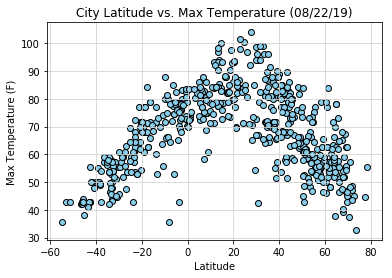

In [26]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (08/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("C:/Users/bvkka/WUSTL201904DATA2/02-Homework/06-Python-APIs/fig1.png")
plt.show()

Latitude vs. Humidity Plot

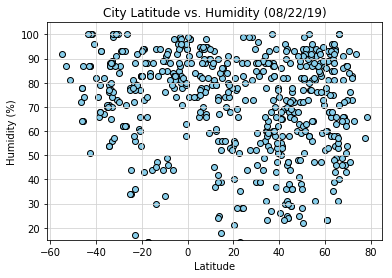

In [25]:

plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (08/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("C:/Users/bvkka/WUSTL201904DATA2/02-Homework/06-Python-APIs/fig2.png")
plt.show()

Latitude vs. Cloudiness Plot

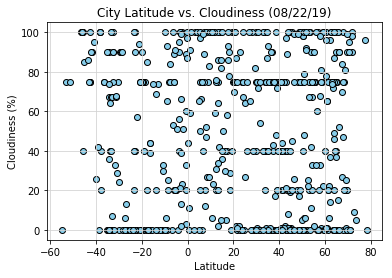

In [24]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (08/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("C:/Users/bvkka/WUSTL201904DATA2/02-Homework/06-Python-APIs/fig3.png")
plt.show()



Latitude vs. Wind Speed Plot

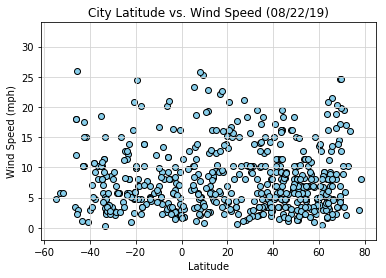

In [28]:

plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (08/22/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("C:/Users/bvkka/WUSTL201904DATA2/02-Homework/06-Python-APIs/fig4.png")
plt.show()